#Homework 9: Classification 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import sklearn.cross_validation as skcv
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

In [2]:
import warnings
warnings.filterwarnings('ignore', lineno=590)
warnings.filterwarnings('ignore', lineno=403)

# Question 1

In [3]:
df_mem = pd.read_csv('membership.csv')
df_mem.head()

,Gender,Payment,FavoriteProduct,Age,Income,HouseholdSize,Sales,Membership
0,Male,Debit,Spirit,27,16000,1,25,0
1,Female,Debit,Beer,30,69000,3,27,0
2,Male,Cash,Spirit,23,34000,1,21,0
3,Male,Debit,Spirit,24,21000,1,13,0
4,Female,Cash,Beer,33,60000,2,46,0


# Question 2

# 2 (a)

Randomly split the dataset into 70% training data and 30% test data.

In [4]:
train, test = skcv.train_test_split(df_mem, test_size = 0.3)

In [5]:
train.shape, test.shape

((700, 8), (300, 8))

# 2 (b)

Train a Naive Bayes classifier to predict Membership.
Train the model on training data only.
Use only Age, Income, HouseholdSize, and Sales as features. Do not use other columns as features for this question.

In [6]:
train['is_member'] = np.where(train.Membership == 1, 
                                "member", "not_member")

//anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [7]:
gnb_model = sknb.GaussianNB().fit(
    train[['Age', 'Income', 'HouseholdSize', 'Sales']], train['is_member'])

In [8]:
y_pred = gnb_model.predict(train[['Age', 'Income', 'HouseholdSize', 'Sales']])

# 2 (c)

Apply the trained classifier to classify the training data, and report the following:
Accuracy,
Precision,
Recall,
F1-score,
Confusion matrix

In [9]:
train['predicted_label'] = y_pred

//anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
# Accuracy
skmetric.accuracy_score(y_true=train['is_member'],
                        y_pred=train['predicted_label'])

0.78142857142857147

In [11]:
# Precision
skmetric.precision_score(y_true=train['is_member'],
                         y_pred=train['predicted_label'],
                         pos_label='member')

0.58454106280193241

In [12]:
# Recall
skmetric.recall_score(y_true=train['is_member'],
                      y_pred=train['predicted_label'],
                      pos_label='member')

0.6436170212765957

In [13]:
# F1 score
skmetric.f1_score(y_true=train['is_member'],
                  y_pred=train['predicted_label'],
                  pos_label='member')

0.6126582278481012

In [14]:
# Compute the Confusion Matrix
cfmat = skmetric.confusion_matrix(
    y_true=train['is_member'],
    y_pred=train['predicted_label'])
cfmat

array([[121,  67],
       [ 86, 426]])

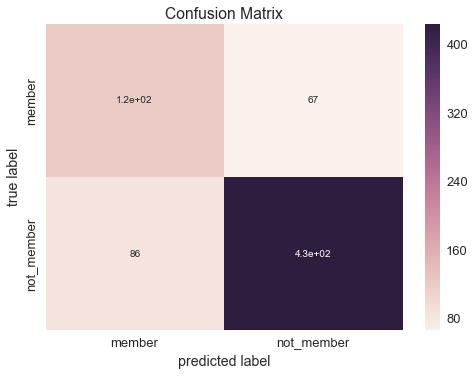

In [15]:
sns.heatmap(cfmat, 
            xticklabels=gnb_model.classes_,
            yticklabels=gnb_model.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')

# 2 (d)

Apply the trained classifier to classify the test data, and report the following:
Accuracy,
Precision,
Recall,
F1-score,
Confusion matrix

In [16]:
# Re-training the classifier to classify test data
test['is_member'] = np.where(test.Membership == 1, 
                                "member", "not_member")
gnb_model2 = sknb.GaussianNB().fit(
    test[['Age', 'Income', 'HouseholdSize', 'Sales']], test['is_member'])
y_pred2 = gnb_model2.predict(test[['Age', 'Income', 'HouseholdSize', 'Sales']])

//anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [17]:
test['predicted_label'] = y_pred2

//anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
# Accuracy
skmetric.accuracy_score(y_true=test['is_member'],
                        y_pred=test['predicted_label'])

0.81333333333333335

In [19]:
# Precision
skmetric.precision_score(y_true=test['is_member'],
                         y_pred=test['predicted_label'],
                         pos_label='member')

0.64102564102564108

In [20]:
# Recall
skmetric.recall_score(y_true=test['is_member'],
                      y_pred=test['predicted_label'],
                      pos_label='member')

0.64102564102564108

In [21]:
# F1 score
skmetric.f1_score(y_true=test['is_member'],
                  y_pred=test['predicted_label'],
                  pos_label='member')

0.64102564102564108

In [22]:
# Compute the Confusion Matrix
cfmat = skmetric.confusion_matrix(
    y_true=test['is_member'],
    y_pred=test['predicted_label'])
cfmat

array([[ 50,  28],
       [ 28, 194]])

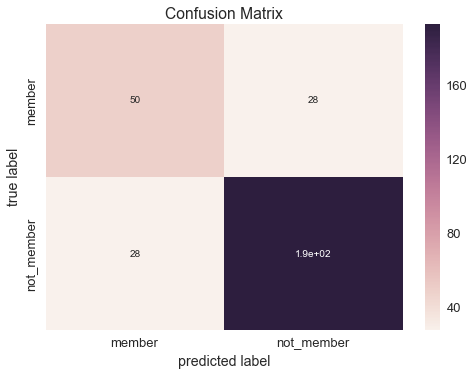

In [23]:
sns.heatmap(cfmat, 
            xticklabels=gnb_model.classes_,
            yticklabels=gnb_model.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')

# 2 (e)

Plot the precision-recall curve using the test data.

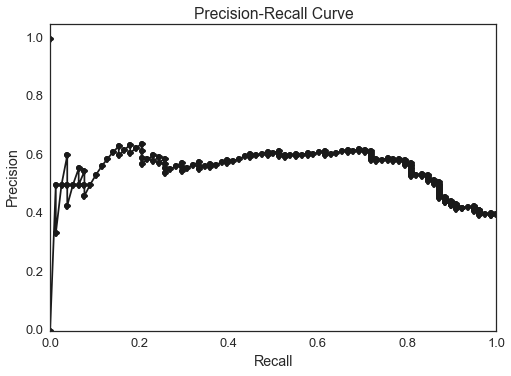

In [24]:
# Precision-Recall Curve
pos_label_idx = gnb_model2.classes_.tolist().index('member')

probas_pred = gnb_model.predict_proba(
   test[['Age', 'Income', 'HouseholdSize', 'Sales']])[:,pos_label_idx]

precisions, recalls, thresholds = skmetric \
    .precision_recall_curve(
        y_true=test['is_member'],
        probas_pred=probas_pred,
        pos_label='member')

# Fourth, plot precision-recall curve
plt.plot(recalls, precisions, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# 2 (f)

Plot the ROC curve using the test data.

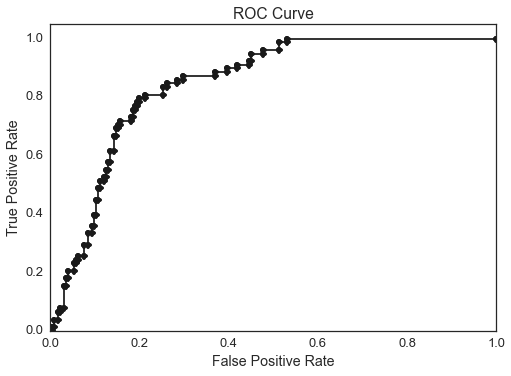

In [25]:
# ROC Curve
# To generate this curve, we can re-use the same information 
# for the precision-recall curve we generated above.

# fpr = "false positive rate"
# tpr = "true positive rate"
fpr, tpr, thresholds = skmetric \
    .roc_curve(y_true=test['is_member'],
               y_score=probas_pred,
               pos_label='member')

plt.plot(fpr, tpr, 'k-o')
plt.ylim(0,1.05)
plt.yticks(np.arange(0,1.05,0.2))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# 2 (g)

Ignore the previous data splits, perform a 10-fold cross validation for Naive Bayes with the same set of features. Report the following:
Average accuracy,
Average precision,
Average recall,
Average F1-score

In [26]:
cv_accuracy = skcv.cross_val_score(gnb_model2, df_mem[['Age', 'Income', 'HouseholdSize', 'Sales']], df_mem.Membership, cv=10, scoring='accuracy')

In [27]:
cv_accuracy

array([ 0.73267327,  0.69306931,  0.79207921,  0.83168317,  0.82      ,
        0.81      ,  0.81818182,  0.81818182,  0.82828283,  0.77777778])

In [28]:
cv_precision = skcv.cross_val_score(gnb_model2, df_mem[['Age', 'Income', 'HouseholdSize', 'Sales']], df_mem.Membership, cv=10, scoring='precision')

In [29]:
cv_precision

array([ 0.5       ,  0.44117647,  0.61538462,  0.67857143,  0.64516129,
        0.64285714,  0.66666667,  0.64285714,  0.65517241,  0.56666667])

In [30]:
cv_recall = skcv.cross_val_score(gnb_model2, df_mem[['Age', 'Income', 'HouseholdSize', 'Sales']], df_mem.Membership, cv=10, scoring='recall')

In [31]:
cv_recall

array([ 0.51851852,  0.55555556,  0.59259259,  0.7037037 ,  0.74074074,
        0.66666667,  0.61538462,  0.69230769,  0.73076923,  0.65384615])

In [32]:
cv_f1 = skcv.cross_val_score(gnb_model2, df_mem[['Age', 'Income', 'HouseholdSize', 'Sales']], df_mem.Membership, cv=10, scoring='f1')

In [33]:
cv_f1

array([ 0.50909091,  0.49180328,  0.60377358,  0.69090909,  0.68965517,
        0.65454545,  0.64      ,  0.66666667,  0.69090909,  0.60714286])

# Question 3: Decision Tree

In [39]:
import pydot_ng as pydot
import sklearn.externals.six as sksix
import IPython.display as ipd

# 3 (a)

Train decision tree classifiers as instructed below:
Use all features.
Hint: use pd.get_dummies() to convert categorical features to dummy variables prior to training.
Train the model on training data only.
Set maximum depth level to be 1, 2, 3, 4, and 5 respectively. This means you will train 5 different decision tree classifiers in total.
Visualize the decision trees using graphviz and pydot. Do this for the decision trees whose maximum depth levels are smaller than or equal to 3. This means you will generate 3 images.

In [40]:
train_dummy = pd.get_dummies(train)
train_dummy.head()

,Age,Income,HouseholdSize,Sales,Membership,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit,Payment_Debit,FavoriteProduct_Beer,FavoriteProduct_Spirit,FavoriteProduct_Wine,is_member_member,is_member_not_member,predicted_label_member,predicted_label_not_member
777,32,91000,2,89,1,0,1,0,1,0,0,0,1,1,0,1,0
471,21,15000,1,22,0,0,1,1,0,0,1,0,0,0,1,0,1
370,27,37000,1,20,0,0,1,1,0,0,0,1,0,0,1,0,1
76,56,64000,3,30,0,0,1,0,0,1,0,0,1,0,1,0,1
165,32,77000,3,195,1,0,1,0,1,0,0,0,1,1,0,1,0


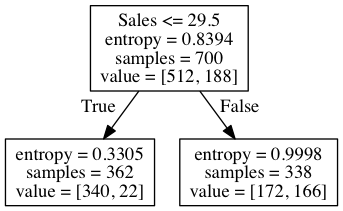

In [45]:
feat = ['Age','Income','HouseholdSize','Sales','Gender_Female','Gender_Male','Payment_Cash','Payment_Credit','Payment_Debit','FavoriteProduct_Beer','FavoriteProduct_Spirit','FavoriteProduct_Wine']

def train_plot_decision_tree(max_depth):
    dt_model = sktree.DecisionTreeClassifier(
            max_depth=max_depth, criterion='entropy') \
        .fit(train_dummy[feat],train_dummy.Membership)
    dot_data = sksix.StringIO()
    sktree.export_graphviz(dt_model, out_file=dot_data,
                           feature_names=train_dummy.columns[:13])
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    png = graph.create_png()
    return png
    

#max_depth=1
png = train_plot_decision_tree(1)
ipd.Image(png)

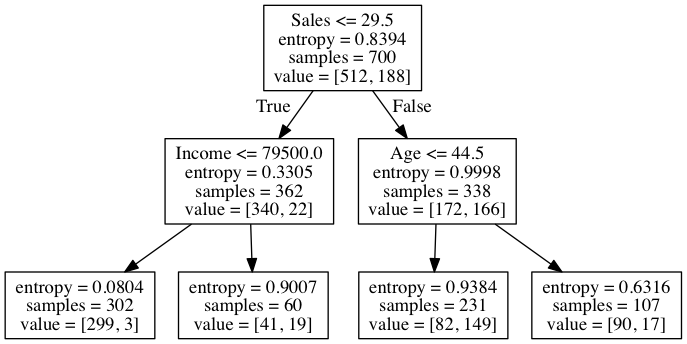

In [46]:
#max_depth=2
png = train_plot_decision_tree(2)
ipd.Image(png)

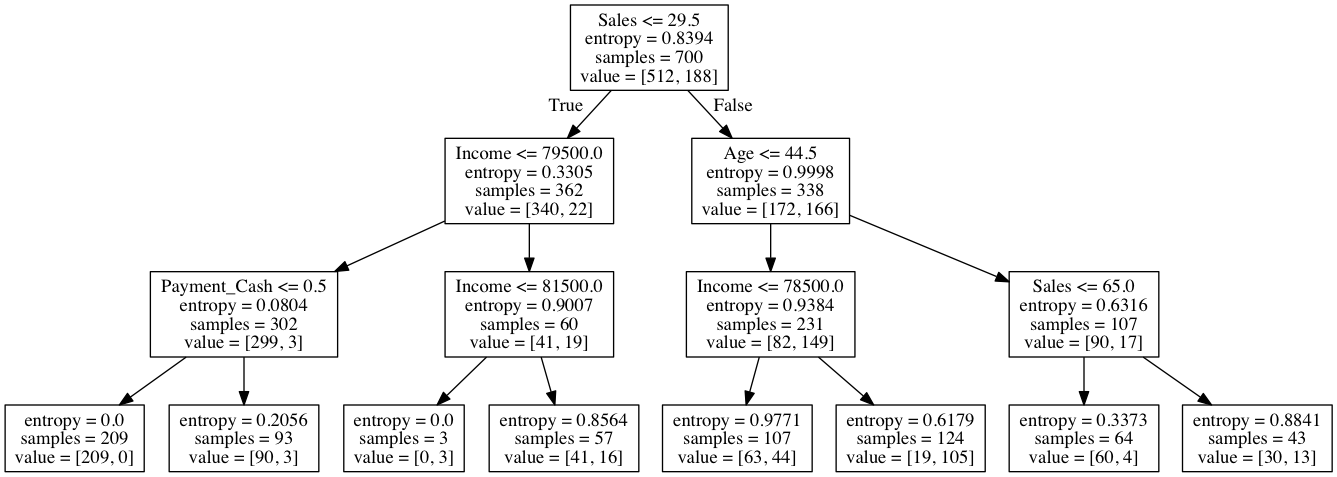

In [47]:
#max_depth=3
png = train_plot_decision_tree(3)
ipd.Image(png)

In [51]:
#max_depth=4
png = train_plot_decision_tree(4)

In [50]:
#max_depth=5
png = train_plot_decision_tree(5)

# 3 (b)

Apply the classifier on the training and test data and generate an appropriate visualization to compare classification accuracy across different depth levels.

In [52]:
test_dummy = pd.get_dummies(test)
test_dummy.head()

,Age,Income,HouseholdSize,Sales,Membership,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit,Payment_Debit,FavoriteProduct_Beer,FavoriteProduct_Spirit,FavoriteProduct_Wine,is_member_member,is_member_not_member,predicted_label_member,predicted_label_not_member
941,56,98000,2,44,0,0,1,1,0,0,0,0,1,0,1,0,1
395,64,112000,3,41,0,1,0,0,1,0,0,0,1,0,1,0,1
131,33,65000,3,45,1,1,0,0,0,1,0,0,1,1,0,0,1
146,53,101000,4,197,1,0,1,1,0,0,0,0,1,1,0,1,0
689,28,13000,1,11,0,0,1,0,1,0,1,0,0,0,1,0,1


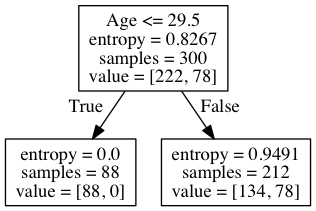

In [53]:
feat = ['Age','Income','HouseholdSize','Sales','Gender_Female','Gender_Male','Payment_Cash','Payment_Credit','Payment_Debit','FavoriteProduct_Beer','FavoriteProduct_Spirit','FavoriteProduct_Wine']

def test_plot_decision_tree(max_depth):
    dt_model = sktree.DecisionTreeClassifier(
            max_depth=max_depth, criterion='entropy') \
        .fit(test_dummy[feat],test_dummy.Membership)
    dot_data = sksix.StringIO()
    sktree.export_graphviz(dt_model, out_file=dot_data,
                           feature_names=test_dummy.columns[:13])
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    png = graph.create_png()
    return png
    

#max_depth=1
png = test_plot_decision_tree(1)
ipd.Image(png)

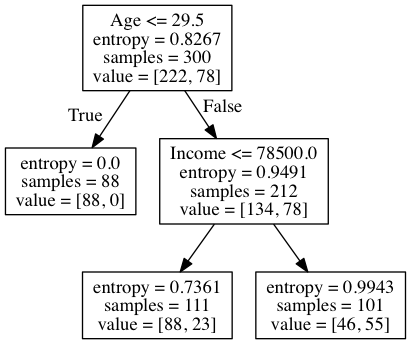

In [54]:
#max_depth=2
png = test_plot_decision_tree(2)
ipd.Image(png)

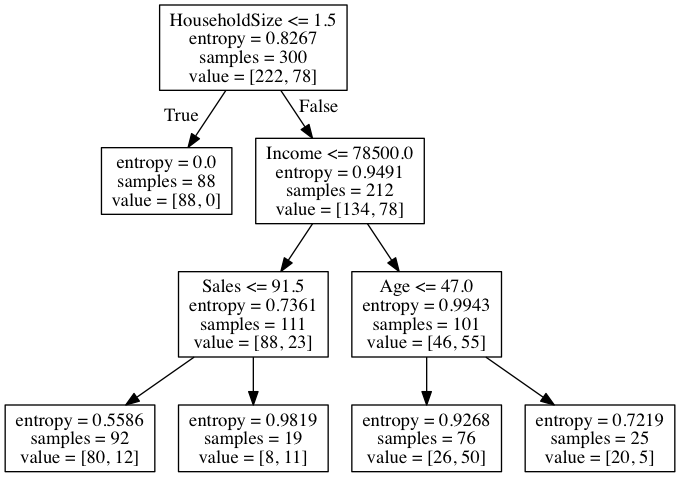

In [55]:
#max_depth=3
png = test_plot_decision_tree(3)
ipd.Image(png)

In [56]:
#max_depth=4
png = test_plot_decision_tree(4)

In [57]:
#max_depth=5
png = test_plot_decision_tree(5)

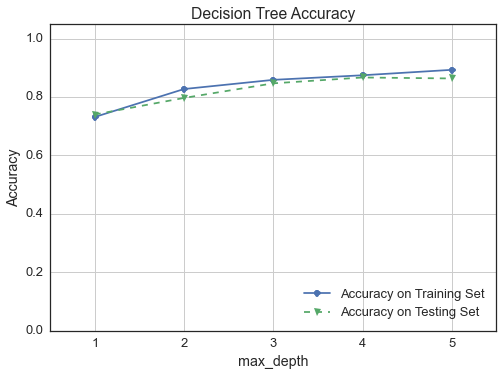

In [62]:
#Compare classification accuracy across different depth levels
max_depths = np.arange(5) + 1
dt_models = [sktree.DecisionTreeClassifier(max_depth=x)
                 .fit(train_dummy[feat],train_dummy.Membership) 
             for x in max_depths]
train_accuracies = [skmetric.accuracy_score(
        train_dummy.Membership, x.predict(train_dummy[feat])) for x in dt_models]
test_accuracies = [skmetric.accuracy_score(
        test_dummy.Membership, x.predict(test_dummy[feat])) for x in dt_models]

plt.plot(max_depths, train_accuracies, '-o', 
         label='Accuracy on Training Set')
plt.plot(max_depths, test_accuracies, '--v',
         label='Accuracy on Testing Set')
plt.ylim(0, 1.05)
plt.xticks(max_depths)
plt.xlim(0.5,5.5)
plt.legend(loc="lower right")
plt.grid(True)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title('Decision Tree Accuracy')

# Question 4: Random Forest

# 4 (a)

Train a random forest classifier using all features on the training data.

In [63]:
rf_model = skens.RandomForestClassifier(
    n_estimators=10, oob_score=True)
rf_model.fit(train_dummy[feat], train_dummy.Membership);

In [64]:
#Check oob 
rf_model.oob_score_

0.81999999999999995

In [65]:
#Make predictions on train data
predicted_labels = rf_model.predict(train_dummy[feat])
train_dummy['predicted_label_rf'] = predicted_labels

# 4 (b)

Compare feature importance using a barchart.

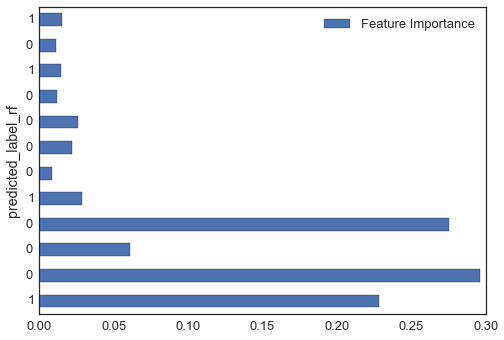

In [74]:
feature_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feature_importance}, 
             index=train_dummy['predicted_label_rf'][:12]).plot(kind='barh')

# 4 (c)

 Apply the classifier on the test data and report the following:
Accuracy,
Precision,
Recall,
F1-score,
Confusion matrix

In [69]:
rf_model2 = skens.RandomForestClassifier(
    n_estimators=10, oob_score=True)
rf_model2.fit(test_dummy[feat], test_dummy.Membership);

predicted_labels2 = rf_model2.predict(test_dummy[feat])
test_dummy['predicted_label_rf'] = predicted_labels2

In [70]:
# Accuracy
skmetric.accuracy_score(test_dummy.Membership, 
                        test_dummy.predicted_label_rf)

0.97666666666666668

In [71]:
# Precision
skmetric.precision_score(y_true = test_dummy.Membership,
                         y_pred = test_dummy.predicted_label_rf,
                         pos_label=1)

1.0

In [72]:
# Recall
skmetric.recall_score(y_true = test_dummy.Membership,
                      y_pred = test_dummy.predicted_label_rf,
                      pos_label=1)

0.91025641025641024

In [73]:
# F1 score
skmetric.f1_score(y_true = test_dummy.Membership,
                  y_pred = test_dummy.predicted_label_rf,
                  pos_label = 1)

0.95302013422818799

In [75]:
# Compute the confusion matrix
cfmat = skmetric.confusion_matrix(
    y_true = test_dummy.Membership,
    y_pred = test_dummy.predicted_label_rf)
cfmat

array([[222,   0],
       [  7,  71]])

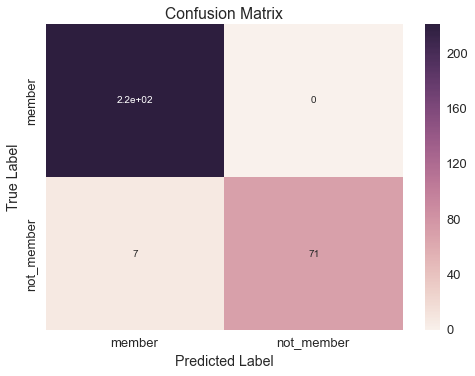

In [77]:
# Visualize the confusion matrix
sns.heatmap(cfmat, 
            xticklabels=gnb_model.classes_,
            yticklabels=gnb_model.classes_,
            annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# 4 (d)

Compare the performance of all three types of classifiers, and provide a short analysis (three or four sentences).

With a Naive Bayes classifier you have to write code to show it how to classify the data, essentially building the classifier yourself. With Decision Trees you specify the table of data, and the built in Classifier function does the rest. Random Forest is another built-in function that constructs multiple decision trees at training and outputs the classification that is the most common of the classes or is the average prediction of the individual trees.

Random Forest in part 4 provided the highest Accuracy score of the three.

#Question 5: Understanding Unfamiliar Code via API Lookup

#5 (a)

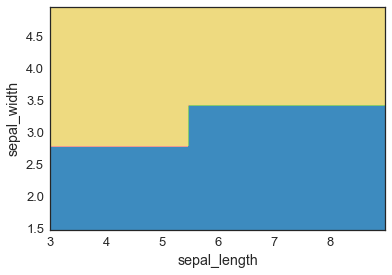

In [79]:
import numpy as np
import seaborn as sns
import sklearn as sk
import sklearn.tree as skt
import matplotlib.pyplot as plt
%matplotlib inline
df_iris = sns.load_dataset('iris')
is_setosa = np.where(df_iris.species=='setosa', 1, 0)
dt_model = skt.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_model.fit(df_iris.ix[:,:2], is_setosa)
xx, yy = np.meshgrid(np.arange(3, 9, 0.02), np.arange(1.5, 5, 0.02)) #line 11
Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()]) #line 12
Z = Z.reshape(xx.shape) #line 13
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) #line 14
plt.xlabel(df_iris.columns[0])
plt.ylabel(df_iris.columns[1])

Line 11: np.meshgrid returns coordinate matrices from coordinate vectors. It makes N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1,... xn. Here, np.arange(3, 9, 0.02) and np.arange(1.5, 5, 0.02) are the coordinates.
    
Line 12: dt_model.predict() produces predicted values found by evaluating the regression function in dt_model. .ravel() returns a 1-D array, containing the elements of the input. Parameters: a = input array, order = order to be read in. 

Line 13: Z.reshape() gives a new shape to an array without changing its data. Parameters: a = array to be reshaped, newshape = the new shape should be compatible with the original shape. If an integer, then the result will be a 1-D array of that length, order = reading the elements and putting them into the array in specified order. This function returns a new object if possible, else a copy.

Line 14: plt.contour gives a graph that represents a 3-dimensional surface by plotting constant z slices, called contours, on a 2-dimensional format. This code function will return a contour map with 3 automatically computed contour lines, the labels will be manually set by means of the array manual_locations which contains 3 tuples with the coordinates for each label.


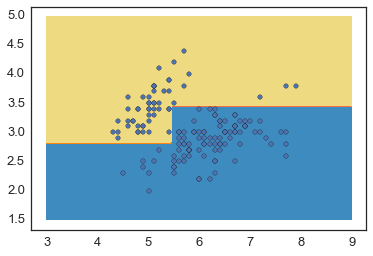

In [80]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(df_iris.sepal_length, df_iris.sepal_width, zorder =1)

#Question 6: Final Project

(a) What data will you use in your project (and indicate if you already have it)?

I would like to use the January 2015 Political Survey data from PewResearchCenter. The data can be found here: http://www.people-press.org/category/datasets/pages/2/.

(b) What questions will you ask?

I am curious to know what topics were of most important when people were surveyed in January, if popular opinion were predictive of any of President Obama's big decisions since, and how the opinions of people surveyed in January relates to the 'hot topics' talked about now with the Presidential Candidates for 2016.

(c) Why do you think the data and the questions you pick will make a good EDA project?

I think it will be interesting to see if there is any correlation between popular opinions of the public and what the President does within the year after the data was collected. Also if there is a correlation between these opinions and what topics became most important in the 2016 race for President.